# Homework 2 by Jeb Besecker #
#### 3/25/2025

1. Load and explore the Student Performance Dataset.

In [526]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [527]:
# Load and explore dataset
df = pd.read_csv("../../Homework/Data/Student Performance Dataset.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [528]:
# Checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               989 non-null    object
 2   parental level of education  979 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<Axes: >

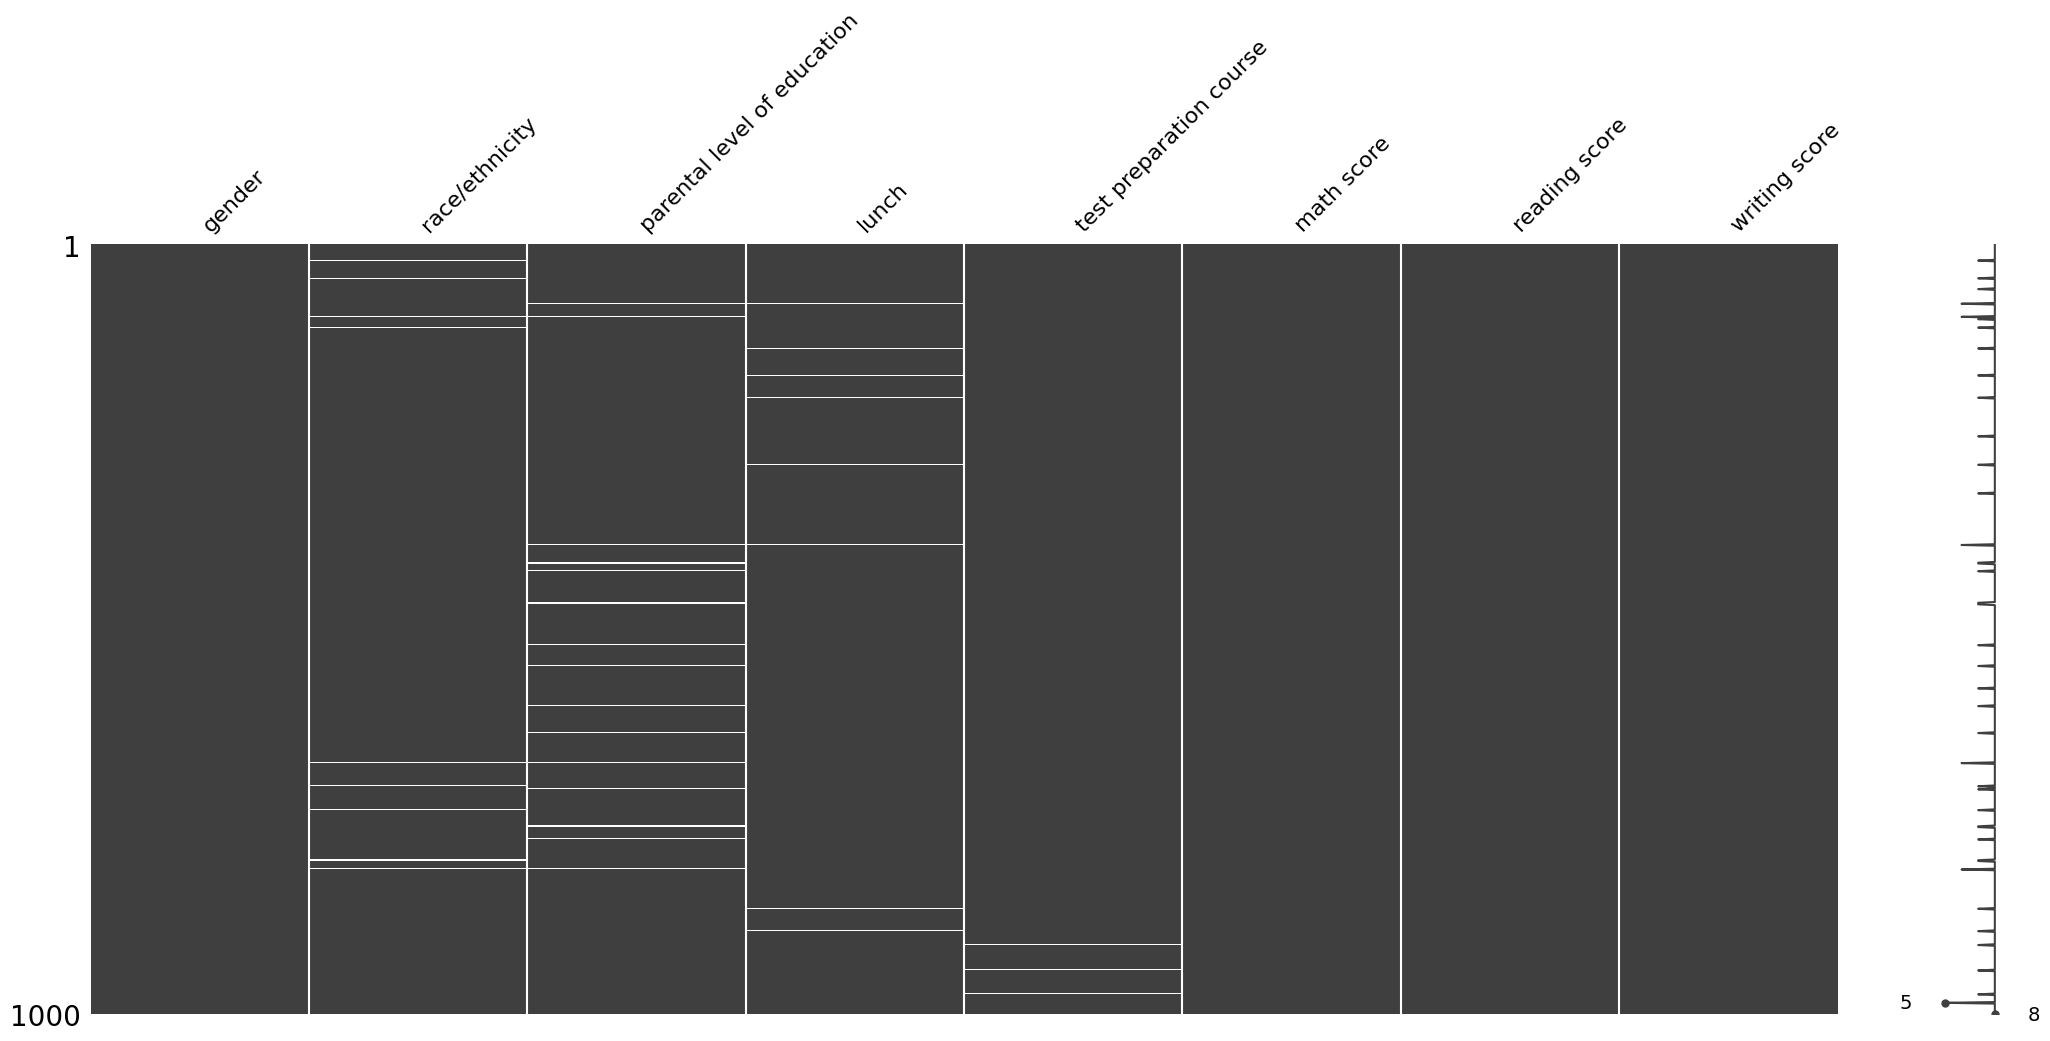

In [529]:
# Explore MissingNo
mno.matrix(df)

2. Create a table outlining the issues with the original data and how you treated it.


In [530]:
# Changelog to store changes
changelog = []

In [531]:
# Filter rows that contain any nulls
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)


     gender race/ethnicity parental level of education         lunch  \
21   female            NaN                some college  free/reduced   
44   female            NaN          associate's degree  free/reduced   
58     male        group D                         NaN      standard   
77     male        group A                         NaN           NaN   
94   female            NaN                         NaN      standard   
97   female        group E                some college           NaN   
108  female            NaN          associate's degree  free/reduced   
135    male        group C           bachelor's degree           NaN   
170    male        group A                 high school           NaN   
199  female        group B           bachelor's degree           NaN   
249    male        group C                 high school           NaN   
286    male        group E          associate's degree           NaN   
323  female        group C            some high school          

In [532]:
# Categorical Variables imputation
si = SimpleImputer(strategy='most_frequent')
df[['race/ethnicity']] = si.fit_transform(df[['race/ethnicity']])
# Changelog addition explaining the imputation
changelog.append({
    'column': 'race/ethnicity',
    'change': 'Imputed missing values using mode',
    'rationale': 'Categorical variable with missing values uses mode',
})

df[['lunch']] = si.fit_transform(df[['lunch']])

# Changelog addition explaining the imputation
changelog.append({
    'column': 'lunch',
    'change': 'Imputed missing values using mode',
    'rationale': 'Categorical variable with missing values uses mode',
})
df[['test preparation course']] = si.fit_transform(df[['test preparation course']])

# Changelog addition explaining the imputation
changelog.append({
    'column': 'test preparation course',
    'change': 'Imputed missing values using mode',
    'rationale': 'Categorical variable with missing values uses mode',
})

# Parent did not attend highschool
si_str = SimpleImputer(strategy='constant', fill_value='did not attend highschool')
df[['parental level of education']] = si_str.fit_transform(df[['parental level of education']])

# Changelog addition explaining the imputation
changelog.append({
    'column': 'parental level of education',
    'change': 'Imputed missing values using constant: "did not attend highschool"',
    'rationale': 'Missing parent education could mean no education at all and I wanted to fill it with a constant value as it could be a valid category',
})

# Check for missing values again
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [533]:
# Check dataframe info after imputation
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [534]:
# Check Numerical Variables 
numericalColumns = df.select_dtypes(include=['float64', 'int64'])
numericalColumns.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<Axes: title={'center': 'math score'}>]], dtype=object)

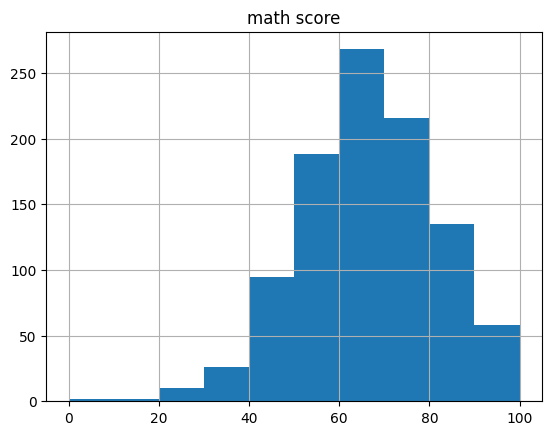

In [535]:
# Check for outliers
df.hist(column='math score')

- No distinguishable outliers. A math score of 0 is possible.

array([[<Axes: title={'center': 'reading score'}>]], dtype=object)

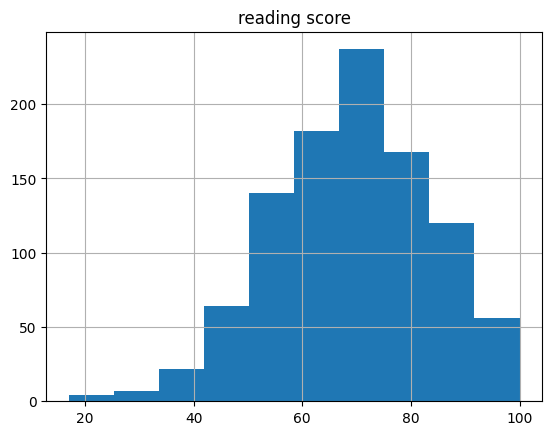

In [536]:
df.hist(column='reading score')

- No distinguishable outliers.

array([[<Axes: title={'center': 'writing score'}>]], dtype=object)

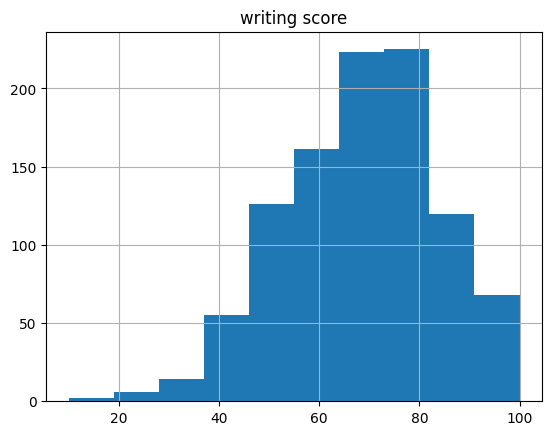

In [537]:
df.hist(column='writing score')

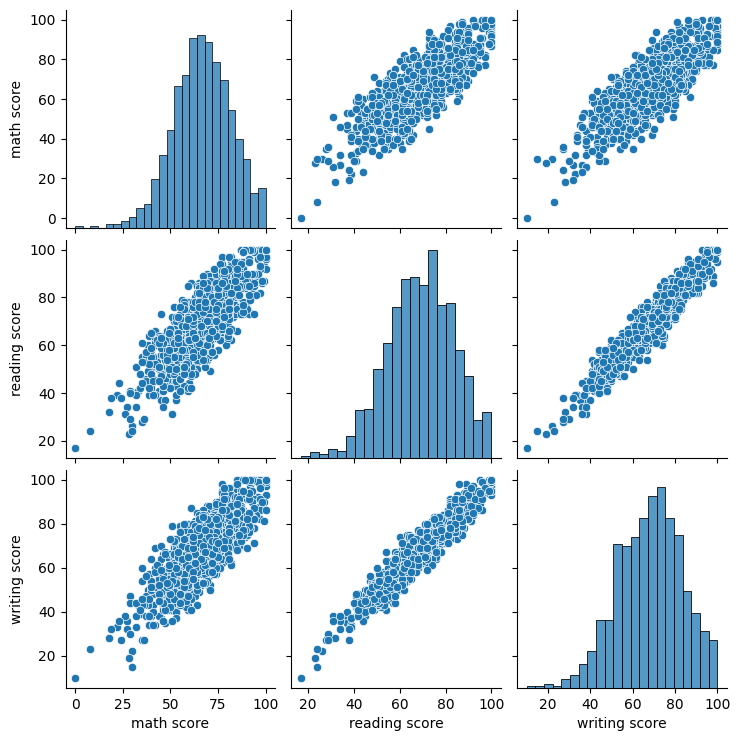

In [538]:
sns.pairplot(df[numericalColumns.columns])

- No distinguishable outliers.

In [539]:
# Pandas Get Dummies for categorical columns
categoricalColumns = df.select_dtypes(include=['object'])
categoricalColumns[:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [540]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [541]:
# Get dummies for categorical columns
df_categorical = pd.get_dummies(df, columns=categoricalColumns.columns, drop_first=True)
df_categorical.head()

# Changelog update
changelog.append({
    'column': 'Categorical Variables',
    'change': 'Created Dummy variables for all categorical variables',
    'rationale': 'Categorical variables were converted to dummy variables for model training',
})


In [542]:
# Check the new dataframe with dummies
df_categorical

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_did not attend highschool,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,False,False,False,False,True,False,False,False,True,False,False,True,False
996,62,55,55,True,False,True,False,False,False,False,True,False,False,False,False,True
997,59,71,65,False,False,True,False,False,False,False,True,False,False,False,False,False
998,68,78,77,False,False,False,True,False,False,False,False,False,True,False,True,False


In [543]:
# Change summary Dataframe
change_summary = pd.DataFrame(changelog)
pd.set_option('display.max_colwidth', None)
display(change_summary)



,column,change,rationale
0,race/ethnicity,Imputed missing values using mode,Categorical variable with missing values uses mode
1,lunch,Imputed missing values using mode,Categorical variable with missing values uses mode
2,test preparation course,Imputed missing values using mode,Categorical variable with missing values uses mode
3,parental level of education,"Imputed missing values using constant: ""did not attend highschool""",Missing parent education could mean no education at all and I wanted to fill it with a constant value as it could be a valid category
4,Categorical Variables,Created Dummy variables for all categorical variables,Categorical variables were converted to dummy variables for model training


3. Create two tables that provide descriptive statistics of the original data and pre-processed data.
    a. What differences do you notice?


In [544]:
# Original DataFrame
orig_df = pd.read_csv("../../Homework/Data/Student Performance Dataset.csv")

In [545]:
# Descriptive Statistics of Original Dataframe
orig_desc = orig_df.describe()
orig_desc

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [546]:
# Descriptive Statistics of Cleaned Dataframe
desc = df_categorical.describe()
desc


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


a)
- Original Dataset: It contained clean variables that did not present any noticeable outliers. One student received a score of 0, but this is entirely plausible.
- Pre-Processed Data: After converting categorical variables into dummy variables, the number of numerical variables significantly increased, providing additional context for analysis.
- Key Differences: The descriptive statistics for scores (math, reading, writing) remain unchanged, but the addition of 13 new dummy variables enhances the available information for modeling.

    b. Highlight the stats where the difference is significant (>20%), moderate (10% - 20%), and
    negligible (< 10%).


b)
- The original numerical variables (math, reading, writing scores) did not undergo any imputation or cleaning, thus, the descriptive statistics will remain the same.
- Incorporating categorical variables as dummy variables significantly impacts models, such as regression analyses. Previously, categorical data needed to be excluded or encoded manually, limiting insights. Including these variables as dummy variables provides context, potentially resulting in a better fitting model. However, to ensure model accuracy and interpretability, performing methods like stepwise regression is necessary to identify statistically significant predictors. 

    c. How might these differences impact your model performance?


 - The addition of the categorical variables as dummy variables will drastically change a model like a regression model. As they now can be utilized in the models calculation whereas before they needed to be left out. More context could result in a better fitting model. However, we would need to perform a stepwise method to determine which variables to keep that are statistically significant. 

4. Perform univariate and bivariate graphical analysis on the pre-processed. For each of the graphs
generated, state your conclusion. You may want to analyze the data statistically as well to get a
better picture (e.g., reviewing the descriptive stats, along with the graphical representation).

## Univariate Analysis

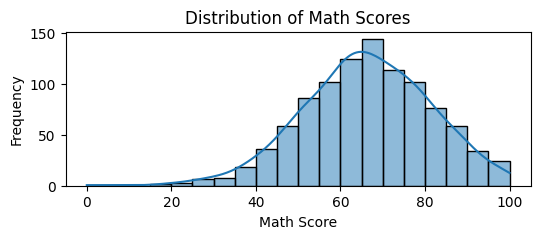

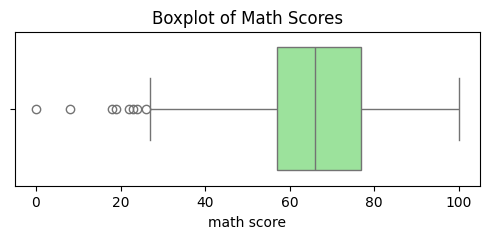

In [547]:
# Univariate Analysis

# Math Scores
plt.figure(figsize=(6, 2))
sns.histplot(df_categorical['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot for math score
plt.figure(figsize=(6, 2))
sns.boxplot(x=df_categorical['math score'], color='lightgreen')
plt.title('Boxplot of Math Scores')
plt.show()


- Math scores show a roughly normal distribution with a slight left skew. The distribution peaks around scores of 65-70, representing the most common student performance. The left tail indicates several extremely low scores. As I evalulated the scores, it appears students who scored low in math consistently scored lower across all subjects, highlighting a clear pattern of underperformance. This cluster likely shares common traits, such as not completing the test preparation course or having parents with lower education levels. 
- The boxplot similarly highlights a group of lower-performing students, including a student who scored 0. The interquartile range (IQR) spans scores between 50 and 80, meaning half the students scored within this range.

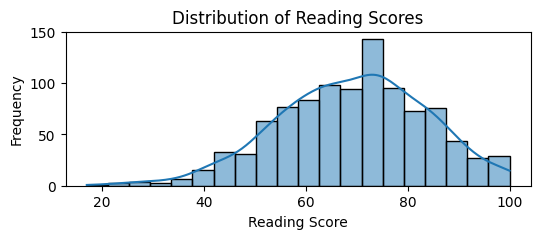

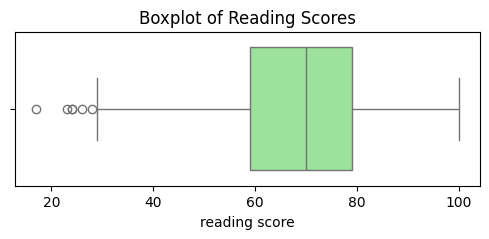

In [548]:
# Reading Scores
plt.figure(figsize=(6, 2))
sns.histplot(df_categorical['reading score'], bins=20, kde=True)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Reading score
plt.figure(figsize=(6, 2))
sns.boxplot(x=df_categorical['reading score'], color='lightgreen')
plt.title('Boxplot of Reading Scores')
plt.show()


- Reading scores show a generally normal distribution with a mild left skew, peaking around scores of 70-75. A few notably low scores appear, again representing the lower performing group identified earlier. 
- The IQR of 60-80 indicates that most students performed slightly better in reading than math. 

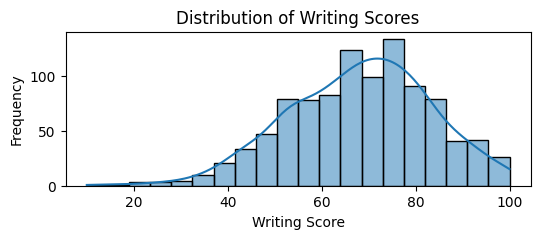

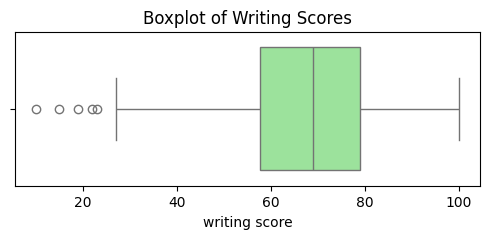

In [549]:

# Writing Scores
plt.figure(figsize=(6, 2))
sns.histplot(df_categorical['writing score'], bins=20, kde=True)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Writing score
plt.figure(figsize=(6, 2))
sns.boxplot(x=df_categorical['writing score'], color='lightgreen')
plt.title('Boxplot of Writing Scores')
plt.show()

- Writing scores follow a generally normal distribution with a slight left skew, similar to reading scores. The distribution peaks at around 70-75. The pattern again highlights a consistent group of lower performing students. 
- The IQR of 60-80 closely aligns with reading scores, reinforcing the relationship between reading and writing performance.  

## Bivariate Analysis 

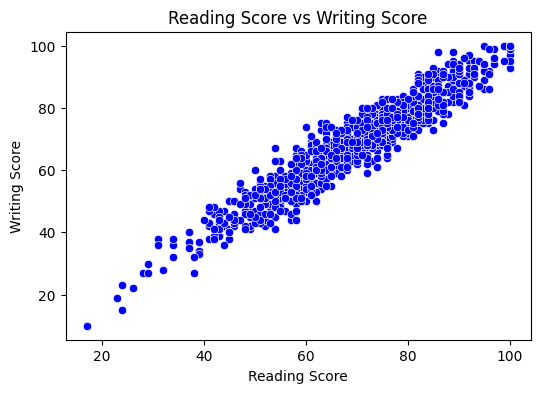

In [550]:
# Bivariate Analysis
# Scatterplot: Reading vs Writing score
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_categorical, x='reading score', y='writing score', color='blue')
plt.title('Reading Score vs Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()



 - A strong positive correlation exists, with students performing similarly in both areas. Students who struggled in reading also tended to struggle in writing, forming a distinct lower-performing group.

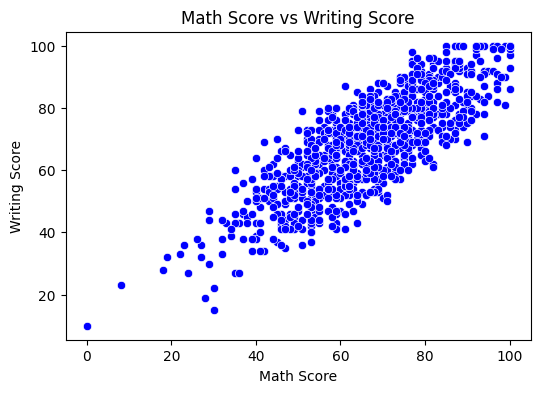

In [551]:
# Scatterplot: Math vs Writing score
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_categorical, x='math score', y='writing score', color='blue')
plt.title('Math Score vs Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.show()

- A clear, moderate positive correlation is shown, though not as tight as between reading and writing. Higher scores in math tend to associate with higher scores in writing, suggesting shared underlying factors like general academic ability, study habits, or family support.

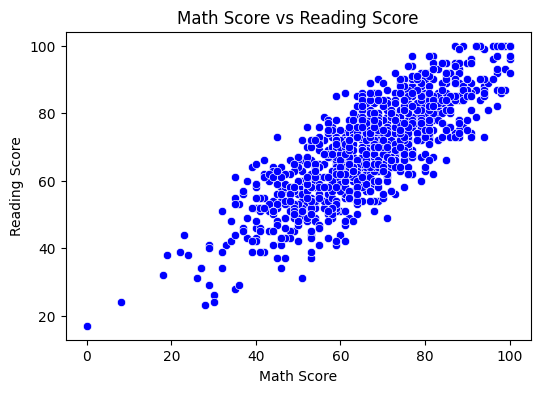

In [552]:
# Scatterplot: Math vs Reading score
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_categorical, x='math score', y='reading score', color='blue')
plt.title('Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

- Again, a moderate positive correlation exists. Students with lower math scores consistently performed poorly in reading.
- As seen throughout all 3 graphs, the students performing negatively on the math scores usually also performed poorly on reading or writing scores. This indicates a struggling group of students in need of more assistance. 